# 14-day cumulative number of COVID-19 cases per 100 000

At the end of the page, we provide a detailed description of how the numbers are calculated.

### Compute data

In [1]:
import datetime as dt
import pandas as pd
pd.set_option("max_rows", None)
from oscovida import get_incidence_rates_countries

## Table for all countries

In [2]:
cases_incidence, deaths_incidence = get_incidence_rates_countries()

Downloaded data: last data point 3/26/21 from https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv
Downloaded data: last data point 3/26/21 from https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv


In [3]:
cases_incidence

,14-day-sum,population,14-day-incidence-rate
Country,,,
Afghanistan,295,38928341,0.8
Albania,7093,2877800,246.5
Algeria,1649,43851043,3.8
Andorra,533,77265,689.8
Angola,696,32866268,2.1
Antigua and Barbuda,177,97928,180.7
Argentina,105304,45195777,233.0
Armenia,11342,2963234,382.8
Australia,140,25459700,0.5


## Table sorted by 14-day-incidence

In [4]:
cases_incidence.sort_values(by=['14-day-incidence-rate'], ascending=False)

,14-day-sum,population,14-day-incidence-rate
Country,,,
Estonia,19301,1326539,1455.0
San Marino,451,33938,1328.9
Hungary,116429,9660350,1205.2
Czechia,126309,10708982,1179.5
Jordan,112878,10203140,1106.3
Montenegro,6753,628062,1075.2
Poland,321669,37846605,849.9
Seychelles,823,98340,836.9
Serbia,63936,8737370,731.8


## Tutorial: Detailed calculation for one country

In [5]:
from oscovida import fetch_cases, get_population
import datetime

In [6]:
period = 14 # Days we compute the incidence rate over

In [7]:
cases = fetch_cases() # Get a DataFrame where each row is the country, and columns cumulative case numbers
cases = cases.groupby(cases.index).sum() # Merge the rows for different regions as we want the numbers for an entire country

In [8]:
cases_germany = cases.loc['Germany'][2:] # First 2 entries are lat/lon so we only take the subsequent ones
cases_germany.tail()

3/22/21    2678262.0
3/23/21    2699231.0
3/24/21    2722988.0
3/25/21    2744608.0
3/26/21    2765297.0
Name: Germany, dtype: float64

In [9]:
yesterday = datetime.datetime.now() - datetime.timedelta(days=1)
x_days_ago = yesterday - datetime.timedelta(days=period)

In [10]:
period_mask = (
    (yesterday > pd.to_datetime(cases_germany.index)) &
    (pd.to_datetime(cases_germany.index) > x_days_ago)
) # Mask for dates between today and x days ago

In [11]:
cases_in_period_per_day_germany = cases_germany[period_mask].diff() # Apply the period mask and get the diff to get the daily new cases
cases_in_period_per_day_germany

3/13/21        NaN
3/14/21     8978.0
3/15/21     6543.0
3/16/21    17679.0
3/17/21     7705.0
3/18/21    28489.0
3/19/21    15476.0
3/20/21    14499.0
3/21/21      768.0
3/22/21     8261.0
3/23/21    20969.0
3/24/21    23757.0
3/25/21    21620.0
3/26/21    20689.0
Name: Germany, dtype: float64

<AxesSubplot:>

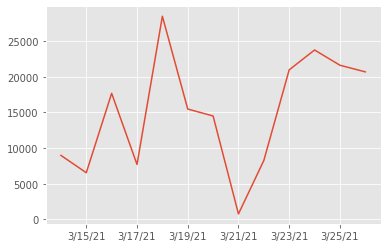

In [12]:
cases_in_period_per_day_germany.plot() # We can easily look at new cases per day

In [13]:
population = get_population().population

In [14]:
population_germany = population.loc['Germany'] # Get the population of Germany
population_germany

83783945.0

In [15]:
incidence_rate_germany = cases_in_period_per_day_germany.sum() / population_germany * 100_000
incidence_rate_germany # By convention this is total cases over period / population * 100_000

233.25829310138118